## **Breve resumo sobre o Pandas**

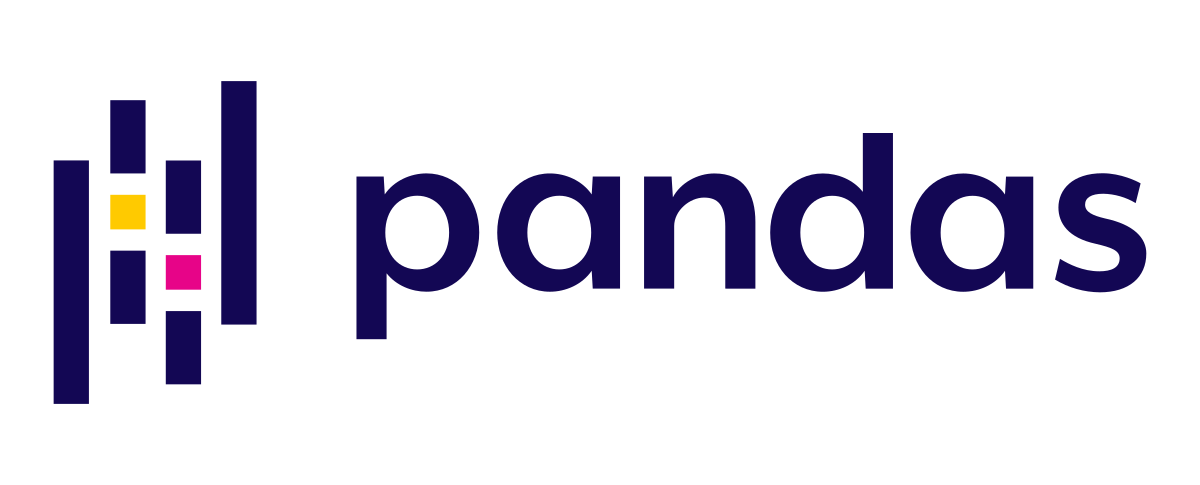

Esse Notebook é um breve resumo sobre a biblioteca Pandas, da linguagem Python.

**O que é Pandas?**

- Pandas é uma biblioteca criada para manipular de forma rápida e expressiva dados estruturados;
- Por isso é uma das ferramentas principais para análise de dados no Python Open Data Science Stack;
- Os 02 principais objetos são: **Series** e **Dataframe**. Tal objetos permite manipulação de dados em séries temporais de alta perfomance, principalmente para *manipulação de dados financeiros*.

## **Importação**

In [ ]:
import pandas as pd

## **Criando DataFrame**

- Dataframe é um conjunto de séries, uma tabela, ou uma matriz. Depende da dimensão.

In [ ]:
df = pd.DataFrame({'Yes': [10,20], 'No': [15,25]})

In [ ]:
df

In [ ]:
df1 = pd.DataFrame({'Dan':['Sim','Não'],'Lila':['Não','Sim']})

In [ ]:
df1

## **Criando os Índices**

- Atribuindo os rótulos (labels) ou Índices ao dataframe, já na criação do dataframe, usando o index:

```
index = [a,b]
```



In [ ]:
df2 = pd.DataFrame({'Dan':['Sim','Não'],'Lila':['Não','Sim']}, index = ['Produto A', 'Produto B'])

In [ ]:
df2

## **Configurando os Índices**

- Os índices não são imutáveis, e por isso podem ser manipulados usando o ```set_index```.

In [ ]:
reviews.set_index('title')

## **Séries**

- Séries são listas com conjunto de valores. É basicamente uma única coluna de um dataframe.

In [ ]:
serie1 = pd.Series([1,2,3,4,5])
serie1

**Atribuindo Índices:**

In [ ]:
serie2 = pd.Series([1,2,3,4,5], index = ['A','B','C','D','E'])
serie2

## **Lendo um arquivo CSV**

A partir de agora trabalharemos com um dataset disponibilizado pelo Kaggle para estudos.

Para leitura do arquivo csv usaremos a função:
```
pd.read_csv()
```



In [ ]:
wine_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/winemag-data-130k-v2.csv", index_col=0)

In [ ]:
wine_reviews.head()

## **Sumarização com** shape

Usamos o ``` shape ``` para verificar o tamanho do nosso dataset



In [ ]:
wine_reviews.shape

- Como podemos notar, o dataset tem 14 atributos e apróximadamente 130 mil linhas. São cerca de 2 milhões de registros.

## **Selecionando Colunas**

- Podemos acessar a propriedade de um objeto chamando - o como um atributo.
Por exemplo:
```
book.title
```



In [ ]:
reviews = wine_reviews

In [ ]:
reviews

In [ ]:
# Acessando a coluna país:

reviews.country

Podemos ainda acessar os valores que se parecem com dicionário usando o ```[ ] ```. 



In [ ]:
reviews['country'][0]

'Italy'

### **Seleção Avançada:**

Para acessar e fazer seleção dos valores usaremos o: ```loc``` e o ```iloc```.

- Para **seleção baseado em índices**, usaremos o ```iloc```. Pois o ```iloc``` nos permite a seleção dos valores com base na sua posição númerica.

- Para **seleção baseada em rótulos**, usaremos o ```loc```. Nesse caso é o valor, o rótulo do índice e não a sua posição  que importa.



In [ ]:
reviews.head()

In [ ]:
#Selecionando tudo que está no índice 0;

reviews.iloc[0]

- Tanto o ```loc```como o ``ìloc```consideram primeiro a linha e depois a coluna. No código abaixo iremos selecionar todas as linhas da coluna [0], que é País.

In [ ]:
reviews.iloc[:,0]

Para selecionar apenas Italia, Portugal e Estados Unidos (As 03 primeiras linha) usaremos o exempo abaixo:

In [ ]:
reviews.iloc[:3,0]

Para selecionar os 5 últimos elementos, faríamos:

In [ ]:
reviews.iloc[-5:]

**Usando** o ```loc```

In [ ]:
# Usando o loc para selecionar a 1ª entrada
# Da coluna country

reviews.loc[0,'country']

In [ ]:
# Criando um subdataset com slice
# Usando Loc

sub = reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]
sub

### **Seleção Condicionais**

- São formas de realizarmos a seleção das colunas de acordo com o uso dos operadores condicionais.

In [ ]:
reviews.country == 'Italy'

0          True
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

In [ ]:
reviews.loc[reviews.country == 'Italy']

In [ ]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

- Seleção com ```isin``` permite selecionar valores que "está em".

- Seleção com ```isnull``` permite selecionar valores nulos.

In [ ]:
reviews.loc[reviews.country.isin(['Italy','France'])]

In [ ]:
reviews.loc[reviews.price.isnull()]

## **Funções de Resumo**

- Nas funções de resumos temos o ```describe()```, ```mean()```,```unique()```que nos mostram um breve resumo sobre o nosso dataset.

In [ ]:
reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [ ]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [ ]:
reviews.points.mean()

88.44713820775404

In [ ]:
reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

A função ```value_count```mostra os valores únicos e com que frequência eles ocorrem.

In [ ]:
reviews.taster_name.value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

### **Mapeamento - função de resumo**

A função ```map()``` Mapeia a utilização de uma outra função para um conjunto de dados já definido.

In [ ]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

## **Agrupamento e Seleção**

In [ ]:
reviews.groupby('points').points.count()

- Podemos usar qualquer uma das funções de resumos com o ```groupby()```.
Por exemplo, para saber os vinhos mais baratos faremos:

In [ ]:
reviews.groupby('points').price.min()

Realizando um simples resumo estatístico com o ```agg()```

In [ ]:
reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
Australia,2329.0,5.0,850.0
Austria,3345.0,7.0,1100.0
Bosnia and Herzegovina,2.0,12.0,13.0
Brazil,52.0,10.0,60.0
Bulgaria,141.0,8.0,100.0
Canada,257.0,12.0,120.0
Chile,4472.0,5.0,400.0


É muito comum ao fazer agrupamento com 2 ou mais colunas o dataframe se tornar *multi-index*, para isso requer uma função especial para converte-lo em um índice padrão, que é o ```reset_index()```

In [ ]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85
...                          ...
Uruguay   Juanico             12
          Montevideo          11
          Progreso            11
          San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [ ]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


### **Seleção**

In [ ]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
118,France,Bordeaux,5941
227,Italy,Tuscany,5897
409,US,Oregon,5373
...,...,...,...
101,Croatia,Krk,1
247,New Zealand,Gladstone,1
357,South Africa,Piekenierskloof,1
63,Chile,Coelemu,1


In [ ]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


## **Tipos de Dados e Valores Ausentes**

Função ```dtype```

In [ ]:
reviews.price.dtype

dtype('float64')

In [ ]:
reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [ ]:
# Convertendo um tipo de dado

reviews.points.astype('float64')

0         87.0
1         87.0
2         87.0
3         87.0
4         87.0
          ... 
129966    90.0
129967    90.0
129968    90.0
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

In [ ]:
# Valores Ausentes

reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [ ]:
reviews.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129966              Unknown
129967         Oregon Other
129968              Unknown
129969              Unknown
129970              Unknown
Name: region_2, Length: 129971, dtype: object

Método ```replace()```para substituir valores

In [ ]:
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0             @kerino
1          @vossroger
2         @paulgwine 
3                 NaN
4         @paulgwine 
             ...     
129966            NaN
129967    @paulgwine 
129968     @vossroger
129969     @vossroger
129970     @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

## **Renomeando e Combinando Valores**

Usando a função ```rename()```para alterar nome da coluna e índices.

In [ ]:
reviews.rename(columns = {'points': 'score'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})

In [ ]:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


Usando o método ```join()```,```merge()```,```concatenate()```, para fazer combinações